In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("sales_data_sample.csv")

# View first few rows
df.head()


,Date,Product,Category,Region,Units Sold,Unit Price
0,2023-04-11,Smartphone,Electronics,East,1,1500
1,2023-02-08,Shirt,Clothing,North,8,35000
2,2023-06-25,Headphones,Electronics,East,6,1500
3,2023-04-02,Shirt,Clothing,West,9,70000
4,2023-06-16,Laptop,Electronics,South,9,1200


In [2]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new 'Revenue' column
df['Revenue'] = df['Units Sold'] * df['Unit Price']

# Check again
print(df.info())
print(df.isnull().sum())

# Preview the updated data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Product     100 non-null    object        
 2   Category    100 non-null    object        
 3   Region      100 non-null    object        
 4   Units Sold  100 non-null    int64         
 5   Unit Price  100 non-null    int64         
 6   Revenue     100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB
None
Date          0
Product       0
Category      0
Region        0
Units Sold    0
Unit Price    0
Revenue       0
dtype: int64


,Date,Product,Category,Region,Units Sold,Unit Price,Revenue
0,2023-04-11,Smartphone,Electronics,East,1,1500,1500
1,2023-02-08,Shirt,Clothing,North,8,35000,280000
2,2023-06-25,Headphones,Electronics,East,6,1500,9000
3,2023-04-02,Shirt,Clothing,West,9,70000,630000
4,2023-06-16,Laptop,Electronics,South,9,1200,10800


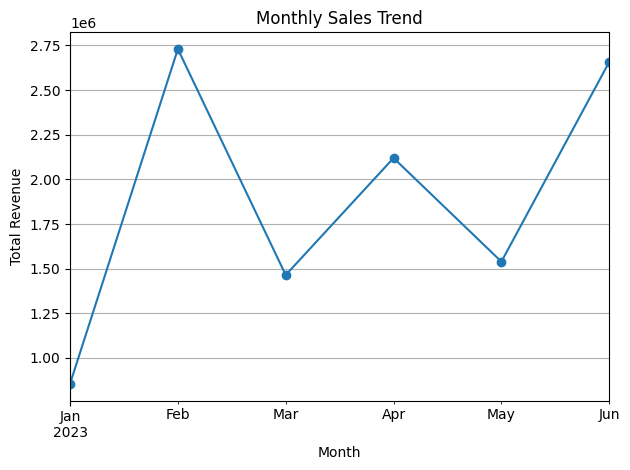

In [3]:
import matplotlib.pyplot as plt

# Group data by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).agg({'Revenue': 'sum'})

# Plot line chart
monthly_sales.plot(kind='line', marker='o', legend=False, title='Monthly Sales Trend')
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


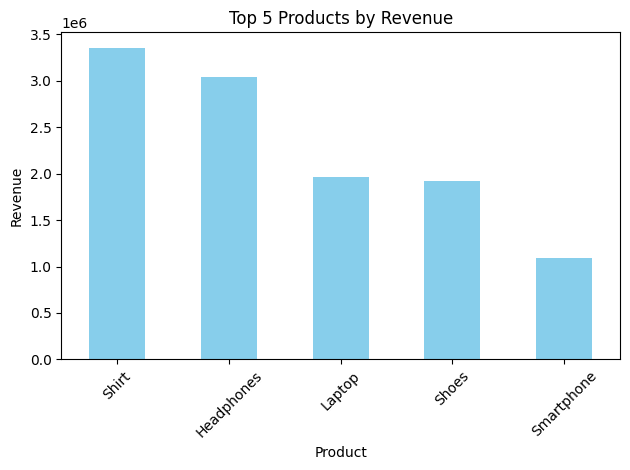

In [4]:
# Group by Product and sum revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

# Bar chart
top_products.plot(kind='bar', color='skyblue', title='Top 5 Products by Revenue')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


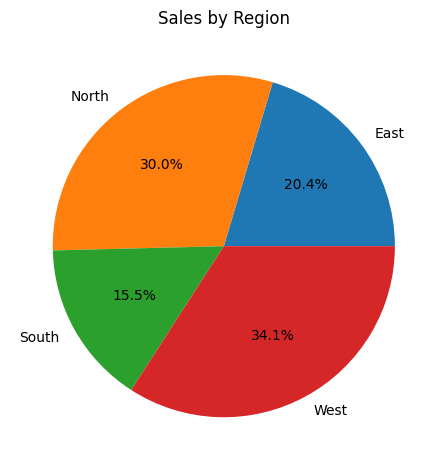

In [5]:
# Group by Region
region_sales = df.groupby('Region')['Revenue'].sum()

# Pie chart
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()


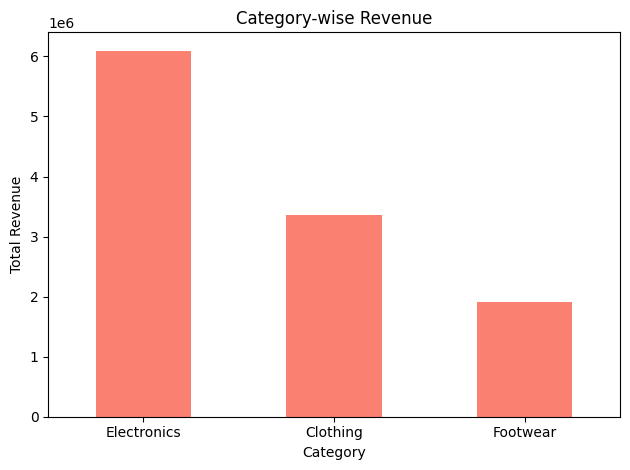

In [6]:
# Group by Category and sum revenue
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Plot
category_sales.plot(kind='bar', color='salmon', title='Category-wise Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


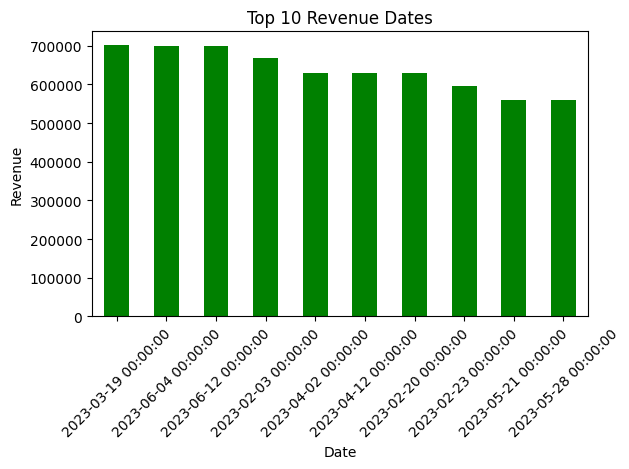

In [7]:
# Group by Date and sum revenue
daily_sales = df.groupby('Date')['Revenue'].sum().sort_values(ascending=False)

# Top 10 highest revenue days
top_days = daily_sales.head(10)

# Plot
top_days.plot(kind='bar', color='green', title='Top 10 Revenue Dates')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Create a summary table
summary = df.groupby('Product').agg({
    'Units Sold': 'sum',
    'Revenue': 'sum'
}).sort_values(by='Revenue', ascending=False)

# Export to CSV
summary.to_csv("sales_summary_report.csv")

